In [1]:
import requests
from bs4 import BeautifulSoup as bs

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="날씨 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'날씨'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'날씨'의 네이버 통합검색 결과입니다."> <title>날씨 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_210401.css"> <link rel="stylesheet" type="text/css" href="https:/
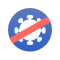
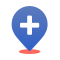
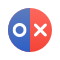
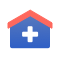

In [2]:
#정보를 가져오려는 사이트의 html 전부 가져오기
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EB%82%A0%EC%94%A8"
html = requests.get(url)
print(html.text)

In [3]:
#html을 전부가져오면 위의 결과처럼 태그와 정보가 섞여서 가독성이 떨어지는데 이때 bs4로 쉽게 필요한 부분을 찾을 수 있다.
b = bs(html.content,"html.parser")

In [4]:
#bs4로 필요한 부분을 찾는 함수는 select와 find, findall이 있는데 find와 findall은 html태그 기준으로 찾는 기능입니다.
#여기서는 find, findall만 사용합니다.
weather_box=b.find('div',{'class':'weather_box'})
print(weather_box)

<div class="weather_box"> <div class="weather_area _mainArea"> <div class="sort_box _areaSelectLayer"> <div class="lst_select"> <div class="select_box"> <span class="btn_select" role="button"><em>울산광역시 남구 옥동</em></span> </div> </div> </div> <div class="main_tab"> <ul class="list_tab _mainTab" role="tablist"> <li aria-selected="true" class="_tab" role="tab"> <a href="#" nocr="" onclick="goOtherTCR(this, 'a=nco_x7t*4.todtap&amp;r=1&amp;i=88157038_00000065035F');return false;"><span class="menu"><span class="subline"></span>오늘</span></a> </li> <li class="_tab" role="tab"> <a href="#" nocr="" onclick="goOtherTCR(this, 'a=nco_x7t*4.tomtap&amp;r=1&amp;i=88157038_00000065035F');return false;"><span class="menu"><span class="subline"></span>내일</span></a> </li> <li class="_tab" role="tab"> <a href="#" nocr="" onclick="goOtherTCR(this, 'a=nco_x7t*4.ttttap&amp;r=1&amp;i=88157038_00000065035F');return false;"><span class="menu"><span class="subline"></span>모레</span></a> </li> <li class="_tab" role

In [5]:
day = weather_box.find_all("span",{"class":"day_info"})
real_day = []
for i in day:
    real_day.append(i.text)
    
day = []
for i in real_day:
    print(i)
    day.append(i.split(" "))

for i in day:
    del i[2]
    
day

수 오늘 
목 내일 
금 모레 
토 4.10. 
일 4.11. 
월 4.12. 
화 4.13. 
수 4.14. 
목 4.15. 
금 4.16. 


[['수', '오늘'],
 ['목', '내일'],
 ['금', '모레'],
 ['토', '4.10.'],
 ['일', '4.11.'],
 ['월', '4.12.'],
 ['화', '4.13.'],
 ['수', '4.14.'],
 ['목', '4.15.'],
 ['금', '4.16.']]

In [14]:
temp = weather_box.find_all("li",{"class":"date_info today"})
res_temp=[]
j=0
for i in temp:
    res_temp.append(i.find("dl").text[-8:-1])
    
print(res_temp)

['10°/19°', ' 9°/17°', ' 7°/15°', ' 5°/15°', ' 6°/17°', ' 8°/19°', '13°/20°', ' 8°/16°', ' 7°/18°', ' 7°/20°']


In [15]:
res_temp[0]

'10°/19°'

In [16]:
import re

In [17]:
res = []
j=0
for i in res_temp:
   res.append(re.findall("\d+",i))
print(res)

[['10', '19'], ['9', '17'], ['7', '15'], ['5', '15'], ['6', '17'], ['8', '19'], ['13', '20'], ['8', '16'], ['7', '18'], ['7', '20']]


In [18]:
print(f"{day[0][1]} 최저기온은 {res[0][0]}도이고 최고기온은 {res[0][1]}도입니다.")

오늘 최저기온은 10도이고 최고기온은 19도입니다.
